# Ensemble : Bagging

## 1.환경준비

### (1) import

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from sklearn.tree import plot_tree # 이렇게해서 트리들을 열어볼 수 있다.
from sklearn.ensemble import RandomForestClassifier # random forest 분류기
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### (2) 데이터 준비

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (1-이탈, 0-잔류, Target 변수)


In [2]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data = data.sample(5000, random_state = 2022)
data['CHURN'] = data['CHURN'].map({'LEAVE':1, 'STAY':0})
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
3178,3179,0,119512,51,31,248566,229,5,2,very_sat,very_high,considering,1
14926,14927,1,142144,192,15,774317,581,29,4,unsat,very_little,never_thought,1
15116,15117,1,142308,0,79,306426,497,1,1,sat,little,considering,0
12733,12734,1,113385,0,0,333599,819,1,6,very_unsat,very_high,considering,1
14032,14033,1,90348,209,10,637286,360,26,4,unsat,little,actively_looking_into_it,0


## 2.데이터 준비

### (1) 데이터 정리

In [3]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

### (2) 데이터분할1 : x, y 나누기

In [4]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

In [5]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

### (5) 데이터분할2 : train : validation

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 2022)

## 3.모델링 : 랜덤포레스트


In [7]:
# 모델 선언
# n_estimator: 모델 개수(트리) , 기본 값은 100 
# max_depth : 트리니까 max_depth 옵션 추가
model = RandomForestClassifier(n_estimators = 5, max_depth = 3)

In [8]:
# 학습
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=5)

In [9]:
# 예측
pred = model.predict(x_val)

In [10]:
# 평가
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       769
           1       0.68      0.67      0.68       731

    accuracy                           0.69      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.69      0.69      0.69      1500



## 4.시각화와 변수중요도

### (1) 모델의 내부를 살펴봅시다.

In [11]:
# 5개 decision tree (랜덤포레스트 다섯개의 모델)
model.estimators_
# max_features auto는 랜덤값

[DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=956116958),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=124981335),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1904172914),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=190203699),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1999596570)]

In [12]:
model.estimators_[0] # 첫번째 decisiontree

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=432094718)

In [ ]:
#랜덤 포레스트 시각화는 트리 하나하나 열어서 시각화한다는 것임

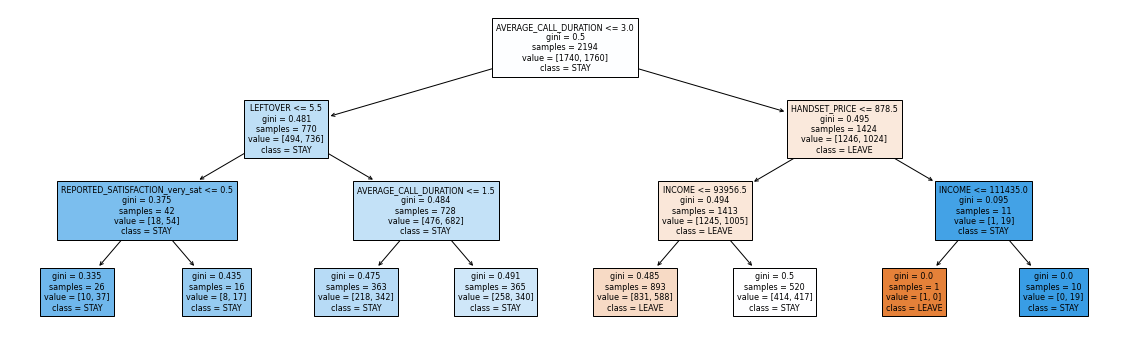

In [12]:
# 각 트리별로 시각화 할 수 있다.
plt.figure(figsize=(20,6))

# 첫번째 트리 보여줘
plot_tree(model.estimators_[0], 
               feature_names = x_train.columns,
               class_names= ['LEAVE','STAY'], 
               filled = True, fontsize = 8);

### (2) 변수 중요도

In [13]:
# 변수 중요도 (트리 각각의 변수 중요도를 평균 내서 전체의 변수 중요도)
print(x_train.columns)
print(model.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')
[9.36418690e-03 2.11492987e-01 2.20127307e-01 2.29142902e-02
 2.25599043e-01 1.02172075e-01 2.70643593e-02 1.61413509e-01
 5.30729421e-03 1.10427981e-03 1.26198440e-03 6.10272312e-04
 0.00000000e+00 0.00000000e+00 1.13935902e-02 0.00000000e+00
 1.74822813e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]


* 변수중요도 그래프 그리기 함수 만들기

In [14]:
# 변수중요도를 표로 보기
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

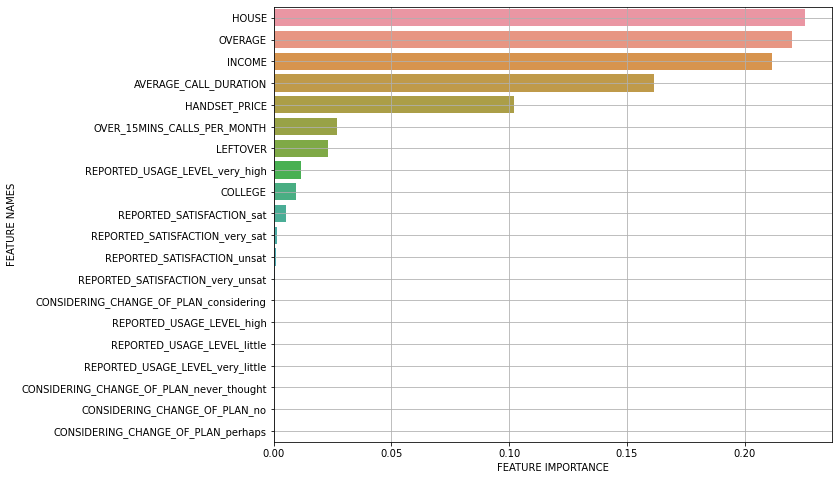

In [15]:
result = plot_feature_importance(model.feature_importances_, x_train.columns)
# 100개 만들면 중요도가 달라질 수 있다.
# 변수 중요도 뽑는 알고리즘 boruta => model.feature_importances 가지고 일반화할 수 있구나.
# 일반적으로 변수중요도도 볼 수 있지 않겠어? 라는 관점에서 boruta 알고리즘 생겨남

In [16]:
result

,feature_names,feature_importance
0,HOUSE,0.225599
1,OVERAGE,0.220127
2,INCOME,0.211493
3,AVERAGE_CALL_DURATION,0.161414
4,HANDSET_PRICE,0.102172
5,OVER_15MINS_CALLS_PER_MONTH,0.027064
6,LEFTOVER,0.022914
7,REPORTED_USAGE_LEVEL_very_high,0.011394
8,COLLEGE,0.009364
9,REPORTED_SATISFACTION_sat,0.005307


## 5.실습: random forest 튜닝

* grid search를 수행합니다.
    * ① n_estimators 의 갯수를 5 ~ 200까지 5개씩 증가시켜가며 튜닝해 봅시다.
    * ② max_features를 1 ~ feature갯수까지 1씩 증가시켜가며 튜닝해 봅시다.
    * ③ n_estimators, max_features를 동시에 튜닝.

* 모델링 후 cv 평가 결과를 차트로 그려봅시다. 
* 튜닝된 모델로 부터 변수중요도를 뽑아 봅시다.


### (1) n_estimators 튜닝

In [17]:
n_features = len(list(x_train))
n_features

20

In [18]:
n_feature = len(list(x_train))
params = {
    'n_estimators' : range(5, 201, 5)
}

In [19]:
model2 = RandomForestClassifier()
m_gs = GridSearchCV(model2, params, cv=5)

In [20]:
m_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(5, 201, 5)})

In [21]:
m_gs.best_params_

{'n_estimators': 195}

In [22]:
m_gs.best_score_

0.6905714285714286

In [34]:
pred1 = m_gs.predict(x_val)

In [35]:
print(accuracy_score(y_val, pred1))
print(classification_report(y_val, pred1))

0.704
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       769
           1       0.70      0.69      0.70       731

    accuracy                           0.70      1500
   macro avg       0.70      0.70      0.70      1500
weighted avg       0.70      0.70      0.70      1500



- 튜닝 결과 그래프로 그리기

In [23]:
# 튜닝 결과를 데이터 프레임으로 저장
result = pd.DataFrame(m_gs.cv_results_)
result.head()

# param_n_estimators가 5, 10, 15, 20 이렇게 증가
# 그리고 그 때의 성능 : mean_test_score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.065313,0.043288,0.005781,0.000886,5,{'n_estimators': 5},0.602857,0.651429,0.657143,0.621429,0.622857,0.631143,0.020251,40
1,0.098146,0.004998,0.009776,0.001593,10,{'n_estimators': 10},0.610000,0.671429,0.670000,0.650000,0.662857,0.652857,0.022732,39
2,0.095793,0.013982,0.009773,0.002182,15,{'n_estimators': 15},0.657143,0.682857,0.658571,0.691429,0.682857,0.674571,0.014009,35
3,0.119361,0.004570,0.007867,0.000223,20,{'n_estimators': 20},0.647143,0.697143,0.665714,0.674286,0.681429,0.673143,0.016596,37
4,0.163366,0.017061,0.013030,0.003237,25,{'n_estimators': 25},0.632857,0.684286,0.664286,0.661429,0.652857,0.659143,0.016699,38


In [24]:
temp = result.loc[:, ['param_n_estimators', 'mean_test_score']]
temp.head() # 제일 보고 싶은 열 두개만 가져옴

,param_n_estimators,mean_test_score
0,5,0.631143
1,10,0.652857
2,15,0.674571
3,20,0.673143
4,25,0.659143


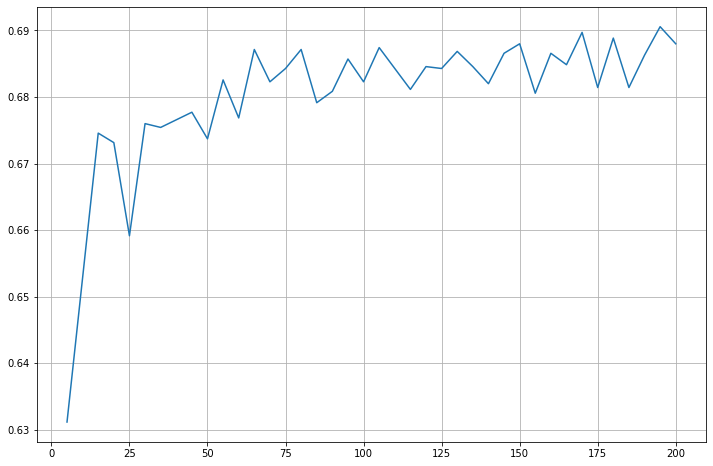

In [25]:
plt.figure(figsize=(12, 8))
plt.plot('param_n_estimators', 'mean_test_score', data=temp)
plt.grid()
plt.show()

# 트리의 개수가 증가하면서 성능이 이렇게 올라간다는 그래프
# 어디가 최적이냐? 가 아니라 경향을 보는 것이 중요.
# n_estimators의 경향을 살펴보기.
# 트리가 많을수록 성능이 올라가다가 어느 순간 꺾임
# 만약 1000개 넘으면 올라갈까 떨어질까 수평일까? 수평!

# 그러면 트리를 많이 만들수록 좋은 게 아니라 적당히 만들어야 함 => 적당지점 찾기 => elbow method

### (2) max_features 튜닝

In [26]:
x_train.shape
# 데이터 3500개, feature 20개

(3500, 20)

In [27]:
# feature을 1개~20개 조절 가능
params = {'max_features':range(1, 21)}

In [31]:
# 기본 모델 선언
m = RandomForestClassifier()

# 그리드 서치 모델 선언
m_gs = GridSearchCV(m, params, cv=5, verbose=3) #verbose는 로그 기록
m_gs = GridSearchCV(RandomForestClassifier(), params, cv=5, verbose=3) #이렇게도 가능

In [32]:
# 튜닝
m_gs.fit(x_train, y_train)

#feature가 많을 수록 시간이 더 걸림
# feature가 많으면 그걸 다 정보전달량 계산해서 선택해야하기 때문

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................................max_features=1; total time=   0.4s
[CV 2/5] END .................................max_features=1; total time=   0.5s
[CV 3/5] END .................................max_features=1; total time=   0.5s
[CV 4/5] END .................................max_features=1; total time=   0.4s
[CV 5/5] END .................................max_features=1; total time=   0.5s
[CV 1/5] END .................................max_features=2; total time=   0.5s
[CV 2/5] END .................................max_features=2; total time=   0.4s
[CV 3/5] END .................................max_features=2; total time=   0.5s
[CV 4/5] END .................................max_features=2; total time=   0.5s
[CV 5/5] END .................................max_features=2; total time=   0.5s
[CV 1/5] END .................................max_features=3; total time=   0.7s
[CV 2/5] END .................................m

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 21)}, verbose=3)

In [33]:
m_gs.best_params_ #feature가 6개 일 때 최대라는 것을 알 수 있음.

{'max_features': 6}

* 변수 중요도

In [34]:
# 튜닝 결과를 데이터 프레임으로 저장
result = pd.DataFrame(m_gs.cv_results_)
temp = result.loc[:, ['param_max_features', 'mean_test_score']]


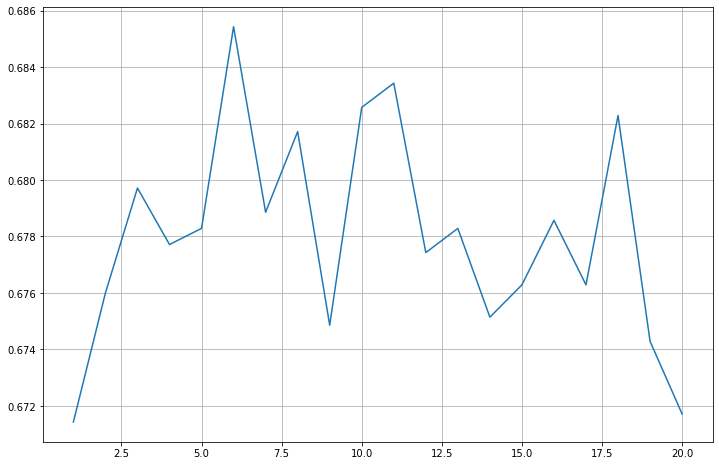

In [35]:
plt.figure(figsize=(12, 8))
plt.plot('param_max_features', 'mean_test_score', data=temp)
plt.grid()
plt.show()

# 경향을 살피는게 중요
# 1이 끝, 20이 끝.
# feature의 개수가 증가하면 성능이 어떻게 달라지지?
# 5.0-7.5 가 성능이 적절하구나.
# n_estimators는 100개가 디폴트이고 100개가 대체로 적절함
# max_features는 root(n_estimators)임. =>  20에 루트씌우면 4.xx 이겠지.
# 근데 4는 너무 낮은것같은데? 보면 4하고 9의 성능차이가 별로 없음.


### (3) n_estimators와 max_features를 한꺼번에 튜닝

In [44]:
params = {
    'n_estimators':  range(100, 201, 50),
    'max_features': range(1, 21)
}

In [45]:
m2 = RandomForestClassifier()
m_gs2 = GridSearchCV(m2, params, cv=5, verbose=3)

In [46]:
m_gs2.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ...............max_features=1, n_estimators=100; total time=   0.4s
[CV 2/5] END ...............max_features=1, n_estimators=100; total time=   0.3s
[CV 3/5] END ...............max_features=1, n_estimators=100; total time=   0.4s
[CV 4/5] END ...............max_features=1, n_estimators=100; total time=   0.3s
[CV 5/5] END ...............max_features=1, n_estimators=100; total time=   0.4s
[CV 1/5] END ...............max_features=1, n_estimators=150; total time=   0.6s
[CV 2/5] END ...............max_features=1, n_estimators=150; total time=   0.8s
[CV 3/5] END ...............max_features=1, n_estimators=150; total time=   0.8s
[CV 4/5] END ...............max_features=1, n_estimators=150; total time=   0.7s
[CV 5/5] END ...............max_features=1, n_estimators=150; total time=   0.9s
[CV 1/5] END ...............max_features=1, n_estimators=200; total time=   1.0s
[CV 2/5] END ...............max_features=1, n_e

[CV 2/5] END ...............max_features=7, n_estimators=200; total time=   1.5s
[CV 3/5] END ...............max_features=7, n_estimators=200; total time=   1.7s
[CV 4/5] END ...............max_features=7, n_estimators=200; total time=   1.6s
[CV 5/5] END ...............max_features=7, n_estimators=200; total time=   1.7s
[CV 1/5] END ...............max_features=8, n_estimators=100; total time=   1.2s
[CV 2/5] END ...............max_features=8, n_estimators=100; total time=   0.8s
[CV 3/5] END ...............max_features=8, n_estimators=100; total time=   0.8s
[CV 4/5] END ...............max_features=8, n_estimators=100; total time=   0.8s
[CV 5/5] END ...............max_features=8, n_estimators=100; total time=   0.8s
[CV 1/5] END ...............max_features=8, n_estimators=150; total time=   1.3s
[CV 2/5] END ...............max_features=8, n_estimators=150; total time=   1.3s
[CV 3/5] END ...............max_features=8, n_estimators=150; total time=   1.4s
[CV 4/5] END ...............

[CV 4/5] END ..............max_features=14, n_estimators=150; total time=   1.8s
[CV 5/5] END ..............max_features=14, n_estimators=150; total time=   2.4s
[CV 1/5] END ..............max_features=14, n_estimators=200; total time=   2.8s
[CV 2/5] END ..............max_features=14, n_estimators=200; total time=   3.0s
[CV 3/5] END ..............max_features=14, n_estimators=200; total time=   2.6s
[CV 4/5] END ..............max_features=14, n_estimators=200; total time=   3.3s
[CV 5/5] END ..............max_features=14, n_estimators=200; total time=   2.7s
[CV 1/5] END ..............max_features=15, n_estimators=100; total time=   2.1s
[CV 2/5] END ..............max_features=15, n_estimators=100; total time=   2.3s
[CV 3/5] END ..............max_features=15, n_estimators=100; total time=   2.1s
[CV 4/5] END ..............max_features=15, n_estimators=100; total time=   2.0s
[CV 5/5] END ..............max_features=15, n_estimators=100; total time=   1.3s
[CV 1/5] END ..............m

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 21),
                         'n_estimators': range(100, 201, 50)},
             verbose=3)

In [49]:
result2 = pd.DataFrame(m_gs2.cv_results_)

temp2 = result2[['param_n_estimators', 'param_max_features', 'mean_test_score']]

In [50]:
temp.head()

,param_max_features,mean_test_score
0,1,0.671429
1,2,0.676000
2,3,0.679714
3,4,0.677714
4,5,0.678286


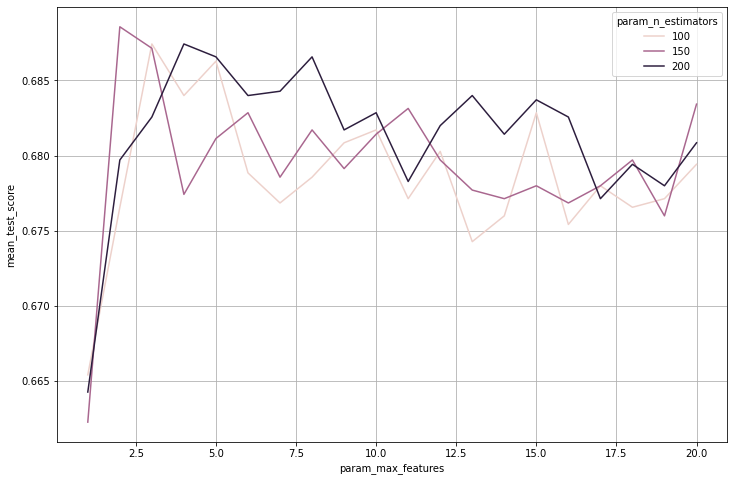

In [56]:
plt.figure(figsize=(12, 8))
sns.lineplot('param_max_features', 'mean_test_score', data=temp2, hue='param_n_estimators')
plt.grid()
plt.show()

- 하이퍼 파라미터가 2개, 3개일 때는 괜찮지만 너무 많아지면 힘들어짐.
- =>그래서 이걸 위한 것이 있음